In [1]:
pwd


'/Users/elenatajadura/dev/git/master-data-science/amadeus_challege'

#### Cogemos una muestra del fichero para que sea mas facil hacer los calculos y luego ya trabajaremos sobre el total

In [2]:
! bzcat searches.csv.bz2 | head -10000 > searches.sample.csv


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = searches.csv.bz2, output file = (stdout)


In [3]:
ls -la


total 2082344
drwxr-xr-x  20 elenatajadura  staff        640 13 dic 18:18 ./
drwxr-xr-x  14 elenatajadura  staff        448  9 dic 13:38 ../
-rw-r--r--@  1 elenatajadura  staff       6148  9 dic 13:05 .DS_Store
drwxr-xr-x  12 elenatajadura  staff        384  9 dic 14:09 .git/
drwxr-xr-x   7 elenatajadura  staff        224 13 dic 17:36 .ipynb_checkpoints/
-rw-r--r--@  1 elenatajadura  staff     173167 30 nov 08:06 10-11_Python_AmadChall_v18.pptx
-rw-r--r--   1 elenatajadura  staff     104098 13 dic 17:34 Untitled.ipynb
-rw-r--r--   1 elenatajadura  staff         72 13 dic 17:36 Untitled1.ipynb
-rw-r--r--@  1 elenatajadura  staff  554970628 30 nov 08:52 bookings.csv.bz2
-rw-r--r--   1 elenatajadura  staff    4232732  9 dic 13:12 bookings.sample.csv
-rw-r--r--   1 elenatajadura  staff     535893 30 nov 09:25 bookings.sample.csv.bz2
-rw-r--r--@  1 elenatajadura  staff      18340 13 dic 16:49 ch_01-clase.ipynb
-rw-r--r--@  1 elenatajadura  staff     144634 13 dic 16:49 ch_02-clase.ipynb
-rw

In [4]:
import pandas as pd

In [5]:
searches = pd.read_csv('searches.sample.csv', sep='^')

In [6]:
searches.shape

(9999, 45)

In [7]:
searches.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [8]:
#Mostramos todas las columnas
pd.set_option('display.max_columns', None)

In [9]:
searches.sample(5)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
5325,2013-01-06,02:20:36,AWC,739433d0c9ea99559a03f40d78d12d0e,BR,SAO,MAO,0,1,SAO,MAO,2013-02-16,TT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,SAO
7709,2013-01-08,10:24:11,MPT,22cf15984f4b13ed8f513a42324666d1,FR,LIL,GLA,1,2,LIL,GLA,2013-04-20,NaN,NaN,GLA,LIL,2013-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,PAR
6201,2013-01-07,21:19:32,FFP,c5152f20dcf4f2240e5cf2342b211f51,CH,GVA,KUL,1,2,GVA,KUL,2013-01-28,JJ,NaN,KUL,GVA,2013-02-04,JJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,ZRH
814,2013-01-01,17:51:06,MPT,48240037f65b32be55e2beb6f00ac2cc,GB,LGW,BGI,1,2,LGW,BGI,2013-01-03,NaN,NaN,BGI,LGW,2013-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,LON
2615,2013-01-03,22:16:19,MTP,e08742a93e1d3d9e679723625a3484fc,DE,DUS,NYC,1,2,DUS,NYC,2013-06-05,NaN,NaN,NYC,DUS,2013-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA


In [10]:
list(searches.columns)

['Date',
 'Time',
 'TxnCode',
 'OfficeID',
 'Country',
 'Origin',
 'Destination',
 'RoundTrip',
 'NbSegments',
 'Seg1Departure',
 'Seg1Arrival',
 'Seg1Date',
 'Seg1Carrier',
 'Seg1BookingCode',
 'Seg2Departure',
 'Seg2Arrival',
 'Seg2Date',
 'Seg2Carrier',
 'Seg2BookingCode',
 'Seg3Departure',
 'Seg3Arrival',
 'Seg3Date',
 'Seg3Carrier',
 'Seg3BookingCode',
 'Seg4Departure',
 'Seg4Arrival',
 'Seg4Date',
 'Seg4Carrier',
 'Seg4BookingCode',
 'Seg5Departure',
 'Seg5Arrival',
 'Seg5Date',
 'Seg5Carrier',
 'Seg5BookingCode',
 'Seg6Departure',
 'Seg6Arrival',
 'Seg6Date',
 'Seg6Carrier',
 'Seg6BookingCode',
 'From',
 'IsPublishedForNeg',
 'IsFromInternet',
 'IsFromVista',
 'TerminalID',
 'InternetOffice']

In [11]:
searches.dtypes

Date                 object
Time                 object
TxnCode              object
OfficeID             object
Country              object
Origin               object
Destination          object
RoundTrip             int64
NbSegments            int64
Seg1Departure        object
Seg1Arrival          object
Seg1Date             object
Seg1Carrier          object
Seg1BookingCode      object
Seg2Departure        object
Seg2Arrival          object
Seg2Date             object
Seg2Carrier          object
Seg2BookingCode      object
Seg3Departure        object
Seg3Arrival          object
Seg3Date             object
Seg3Carrier          object
Seg3BookingCode      object
Seg4Departure        object
Seg4Arrival          object
Seg4Date             object
Seg4Carrier          object
Seg4BookingCode      object
Seg5Departure        object
Seg5Arrival          object
Seg5Date             object
Seg5Carrier          object
Seg5BookingCode      object
Seg6Departure        object
Seg6Arrival         

In [12]:
searches.describe()

,RoundTrip,NbSegments,IsPublishedForNeg,IsFromInternet,IsFromVista
count,9999.000000,9999.000000,9999.0,9999.0,9999.0
mean,0.700670,1.833583,0.0,0.0,0.0
std,0.457987,0.731857,0.0,0.0,0.0
min,0.000000,1.000000,0.0,0.0,0.0
25%,0.000000,1.000000,0.0,0.0,0.0
50%,1.000000,2.000000,0.0,0.0,0.0
75%,1.000000,2.000000,0.0,0.0,0.0
max,1.000000,9.000000,0.0,0.0,0.0


In [13]:
#vemos cuanto elementos diferentes hay
searches.TxnCode.nunique()

33

In [14]:
searches.OfficeID.nunique()

1321

In [15]:
searches.TerminalID.nunique()

864

In [16]:
#Cuantos valores unicos hay en cada uno de las columnas ponemos el describe para que muestre toodo 
#y miramos el campo unique
searches.describe(include='all')

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
count,9999,9999,9999,9999,9999,9999,9999,9999.000000,9999.000000,9999,9999,9972,4047,1143,7195,7195,7160,2870,998,534,534,531,517,508,440,440,439,438,436,103,103,103,103,103,58,58,58,58,58,9924,9999.0,9999.0,9999.0,9999,9999
unique,10,9372,33,1321,104,896,1055,NaN,NaN,896,1046,361,189,27,861,708,361,174,27,225,169,210,89,27,131,160,189,79,26,54,57,82,41,15,35,50,52,30,12,7,NaN,NaN,NaN,864,284
top,2013-01-02,22:12:11,MPT,440642a9bdaeb6287f826cefd73255e8,US,FRA,BKK,NaN,NaN,FRA,BKK,2013-01-11,7V,J,BKK,FRA,2013-01-27,7V,J,JFK,IST,2013-01-26,VR,J,IST,FRA,2013-02-01,VR,J,FRA,AMS,2013-02-22,LK,J,AMS,TXL,2013-10-18,LK,J,1ASIWS,NaN,NaN,NaN,d41d8cd98f00b204e9800998ecf8427e,HPN
freq,1000,3,5820,795,2523,384,268,NaN,NaN,384,269,184,382,331,242,292,90,228,290,13,29,10,46,159,28,38,10,41,141,8,8,4,10,38,8,4,2,6,27,6450,NaN,NaN,NaN,9123,1074
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700670,1.833583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.457987,0.731857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN


In [17]:
#para ver si tenemos nulls
searches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 45 columns):
Date                 9999 non-null object
Time                 9999 non-null object
TxnCode              9999 non-null object
OfficeID             9999 non-null object
Country              9999 non-null object
Origin               9999 non-null object
Destination          9999 non-null object
RoundTrip            9999 non-null int64
NbSegments           9999 non-null int64
Seg1Departure        9999 non-null object
Seg1Arrival          9999 non-null object
Seg1Date             9972 non-null object
Seg1Carrier          4047 non-null object
Seg1BookingCode      1143 non-null object
Seg2Departure        7195 non-null object
Seg2Arrival          7195 non-null object
Seg2Date             7160 non-null object
Seg2Carrier          2870 non-null object
Seg2BookingCode      998 non-null object
Seg3Departure        534 non-null object
Seg3Arrival          534 non-null object
Seg3Date        

In [18]:
searches.columns

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

In [19]:
list(searches.columns)

['Date',
 'Time',
 'TxnCode',
 'OfficeID',
 'Country',
 'Origin',
 'Destination',
 'RoundTrip',
 'NbSegments',
 'Seg1Departure',
 'Seg1Arrival',
 'Seg1Date',
 'Seg1Carrier',
 'Seg1BookingCode',
 'Seg2Departure',
 'Seg2Arrival',
 'Seg2Date',
 'Seg2Carrier',
 'Seg2BookingCode',
 'Seg3Departure',
 'Seg3Arrival',
 'Seg3Date',
 'Seg3Carrier',
 'Seg3BookingCode',
 'Seg4Departure',
 'Seg4Arrival',
 'Seg4Date',
 'Seg4Carrier',
 'Seg4BookingCode',
 'Seg5Departure',
 'Seg5Arrival',
 'Seg5Date',
 'Seg5Carrier',
 'Seg5BookingCode',
 'Seg6Departure',
 'Seg6Arrival',
 'Seg6Date',
 'Seg6Carrier',
 'Seg6BookingCode',
 'From',
 'IsPublishedForNeg',
 'IsFromInternet',
 'IsFromVista',
 'TerminalID',
 'InternetOffice']

## 2) Select the columns of interest

In [73]:
searches_iter = pd.read_csv('searches.csv.bz2', sep='^', usecols = ['Destination', 'Date'], chunksize=1000000)
searches=pd.DataFrame()
for i, search in enumerate(searches_iter):
    print(i)
    search=search.dropna()
    searches=searches.append(search)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [74]:
some_values=['MAD', 'BCN', 'AGP']

In [75]:
searches=searches[searches['Destination'].isin(some_values)]

In [76]:
#probamos a formatear con slice
searches['Plot_Date']=searches.Date.str[0:7]

In [77]:
searches.head()

,Date,Destination,Plot_Date
4,2013-01-01,MAD,2013-01
93,2013-01-01,AGP,2013-01
113,2013-01-01,BCN,2013-01
147,2013-01-01,AGP,2013-01
151,2013-01-01,MAD,2013-01


In [78]:
#searches['Date2']=pd.to_datetime(searches['Date'], format='%Y/%m/%d')

In [79]:
searches.sample(5)

,Date,Destination,Plot_Date
18853928,2013-07-05,BCN,2013-07
2756624,2013-09-01,MAD,2013-09
1928378,2013-05-14,BCN,2013-05
11021288,2013-09-09,BCN,2013-09
9518592,2013-07-04,BCN,2013-07


In [80]:
#Vamos a filtrar solo por los aeropuertos que nos interesan para quitar datos al dataframe
#formatear mes 
#group by mes detino
#count
#plot

In [81]:
#searches['Date']=searches['Date'].str.slice(0, 7, 1) 

In [82]:
searches_gr=searches.groupby(['Plot_Date', 'Destination']).count()

In [86]:
searches_gr.reset_index().head()

,index,Plot_Date,Destination,Date
0,0,2013-01,AGP,9633
1,1,2013-01,BCN,29469
2,2,2013-01,MAD,24258
3,3,2013-02,AGP,8379
4,4,2013-02,BCN,28329


In [83]:
searches_gr.head()

Date
Plot_Date Destination       
2013-01   AGP           9633
          BCN          29469
          MAD          24258
2013-02   AGP           8379
          BCN          28329

In [88]:
to_plot=searches_gr.pivot('Plot_Date', 'Destination', 'Date')

In [89]:
to_plot

Destination,AGP,BCN,MAD
Plot_Date,,,
2013-01,9633,29469,24258
2013-02,8379,28329,22800
2013-03,10659,30552,24681
2013-04,8265,31236,25251
2013-05,10830,28728,26334
2013-06,7923,26505,22800
2013-07,8892,29241,22971
2013-08,7866,27075,21831
2013-09,8151,23427,21147


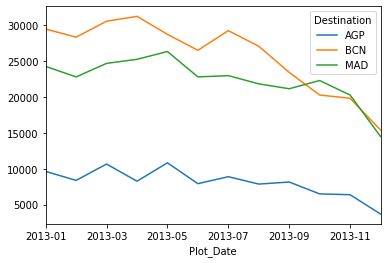

In [90]:
to_plot.plot()

In [54]:
#s_airports=searches[searches['Destination']== 'MAD']

In [55]:
#searches['Year']=pd.DatetimeIndex(searches['Date2']).year

In [56]:
#searches['Month']=pd.DatetimeIndex(searches['Date2']).month

In [87]:
searches.sample(5)

,Date,Destination,Plot_Date
10354440,2013-10-30,MAD,2013-10
8494639,2013-08-26,MAD,2013-08
14210186,2013-07-28,AGP,2013-07
7354985,2013-06-24,AGP,2013-06
18609568,2013-10-28,BCN,2013-10


In [58]:
#years=searches.groupby('Date2').sum()
#years

,Year,Month
Date2,,
2013-01-01,5115033,2541
2013-01-02,2753784,1368
2013-01-03,2639043,1311
2013-01-04,4245417,2109
2013-01-05,3786453,1881
...,...,...
2013-12-21,2141832,12768
2013-12-22,3832752,22848
2013-12-23,2818200,16800


In [59]:
malaga=searches[searches['Destination']== 'AGP']

In [60]:
malaga.sample(5)

,Date,Destination,Date2,Year,Month
8055764,2013-06-07,AGP,2013-06-07,2013,6
5752051,2013-01-08,AGP,2013-01-08,2013,1
9859659,2013-06-16,AGP,2013-06-16,2013,6
10575333,2013-06-14,AGP,2013-06-14,2013,6
10185404,2013-05-14,AGP,2013-05-14,2013,5


In [61]:
madrid=searches[searches['Destination']== 'MAD']

In [62]:
barcelona=searches[searches['Destination']== 'BCN']

In [63]:
malaga_monthly=malaga.groupby('Month').sum()
malaga_monthly

,Year
Month,
1,19391229
2,16866927
3,21456567
4,16637445
5,21800790
6,15948999
7,17899596
8,15834258
9,16407963


In [64]:
madrid_monthly=madrid.groupby('Month').sum()
madrid_monthly

,Year
Month,
1,48831354
2,45896400
3,49682853
4,50830263
5,53010342
6,45896400
7,46240623
8,43945803
9,42568911


In [65]:
barcelona_monthly=barcelona.groupby('Month').sum()
barcelona_monthly

,Year
Month,
1,59321097
2,57026277
3,61501176
4,62878068
5,57829464
6,53354565
7,58862133
8,54501975
9,47158551


In [66]:
import matplotlib.pyplot as plt

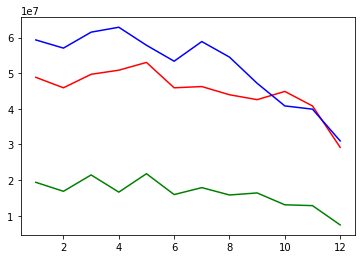

In [67]:
plt.plot(malaga_monthly,'g')
plt.plot(madrid_monthly, 'r')
plt.plot(barcelona_monthly, 'b')